In this code, the road map is doing the regression task at first then the classification task.

In [123]:
#import main libraries and classes
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score

#Import regression classes
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor
from sklearn.preprocessing import PolynomialFeatures

Remember to change the code directory for proper running of the code on your system.

In [124]:
#Mount Drive
from google.colab import drive
drive.mount('/content/drive/')

# Load dataset, change the 'filename' array for the correct file address in your virtual drive
filename = '/content/drive/My Drive/UAV/train_set.tsv'
dataset = pd.read_csv(filename, sep='\t', header=0)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
#let's get some info about the dataset
dataset.info()

In [ ]:
#let's see the dataset
dataset

The Regression Task for minimum CPA starts here.

In [146]:
#set dependent and independent variables
X = dataset.drop('min_CPA', axis=1)
y = dataset['min_CPA']

In [147]:
#preprocessing data considering one classification column
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
 
categorical_feature = ["num_collisions"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_feature)],
                                 remainder="passthrough")

transformed_X = transformer.fit_transform(X)

In [139]:
transformed_X = preprocessing.normalize(transformed_X, norm='l2')

In [148]:
#split to test and train set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size = 0.35, random_state = 2509)

In [149]:
#Regression GBR, RFR, LR
reg_gb = GradientBoostingRegressor(random_state=1)
reg_rf = RandomForestRegressor(random_state=1)
reg_lr = LinearRegression()
reg_gb.fit(X_train, y_train)
reg_rf.fit(X_train, y_train)
reg_lr.fit(X_train, y_train)

LinearRegression()

In [150]:
#Regression Voting
reg_v = VotingRegressor([("gb", reg_gb), ("rf", reg_rf), ("lr", reg_lr)])
reg_v.fit(X_train, y_train)

VotingRegressor(estimators=[('gb', GradientBoostingRegressor(random_state=1)),
                            ('rf', RandomForestRegressor(random_state=1)),
                            ('lr', LinearRegression())])

In [151]:
#Polynomial Regression
poly = PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(X_train)

poly.fit(X_poly, y_train)
reg_poly = LinearRegression()
reg_poly.fit(X_poly, y_train)

LinearRegression()

In [152]:
pred_gb = reg_gb.predict(X_test)
pred_rf = reg_rf.predict(X_test)
pred_lr = reg_lr.predict(X_test)
pred_v = reg_v.predict(X_test)
pred_poly = reg_poly.predict(poly.fit_transform(X_test))

In [153]:
print("GDB Mean squared error: %.2f" % mean_squared_error(y_test, pred_gb))
print("GDB Regression score: %.2f \n" % r2_score(y_test, pred_gb))

print("RF Mean squared error: %.2f" % mean_squared_error(y_test, pred_rf))
print("RF Regression score: %.2f \n" % r2_score(y_test, pred_rf))

print("LR Mean squared error: %.2f" % mean_squared_error(y_test, pred_lr))
print("LR Regression score: %.2f \n" % r2_score(y_test, pred_lr))

print("V Mean squared error: %.2f" % mean_squared_error(y_test, pred_v))
print("V Regression score: %.2f \n" % r2_score(y_test, pred_v))

print("poly Mean squared error: %.2f" % mean_squared_error(y_test, pred_v))
print("poly Regression score: %.2f" % r2_score(y_test, pred_v))

GDB Mean squared error: 57052090.69
GDB Regression score: 0.52 

RF Mean squared error: 54340646.50
RF Regression score: 0.54 

LR Mean squared error: 54620728.21
LR Regression score: 0.54 

V Mean squared error: 53558857.51
V Regression score: 0.55 

poly Mean squared error: 53558857.51
poly Regression score: 0.55


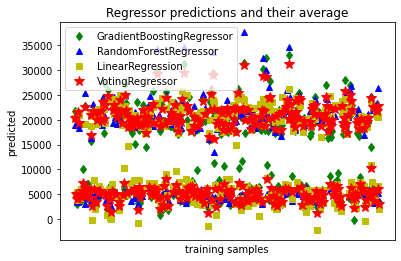

In [136]:
plt.figure()
plt.plot(pred_gb, "gd", label="GradientBoostingRegressor")
plt.plot(pred_rf, "b^", label="RandomForestRegressor")
plt.plot(pred_lr, "ys", label="LinearRegression")
plt.plot(pred_v, "r*", ms=10, label="VotingRegressor")
#plt.plot(pred_poly, "b*", ms=10, label="PolyRegressor")

plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel("predicted")
plt.xlabel("training samples")
plt.legend(loc="best")
plt.title("Regressor predictions and their average")

plt.show()

The Classification task of number of collisions starts here.

In [166]:
#import necessary libraries and classes for the classification task

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing ,neighbors,svm
from sklearn.model_selection import train_test_split

In [167]:
#Load dataset here
from google.colab import drive
drive.mount('/content/drive/')

filename = '/content/drive/My Drive/UAV/train_set.tsv'
df = pd.read_csv(filename, sep='\t', header=0)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [168]:
#we may not need the min_cpa column for classification
df.drop('min_CPA', axis=1, inplace=True)
df.head()

,UAV_1_track,UAV_1_x,UAV_1_y,UAV_1_vx,UAV_1_vy,UAV_1_target_x,UAV_1_target_y,UAV_2_track,UAV_2_x,UAV_2_y,...,UAV_4_target_x,UAV_4_target_y,UAV_5_track,UAV_5_x,UAV_5_y,UAV_5_vx,UAV_5_vy,UAV_5_target_x,UAV_5_target_y,num_collisions
0,0.027068,-62300.591721,-59305.682068,6.705684,247.671970,-59569.480482,41566.912694,1.474570,-56681.475086,-5314.787648,...,-73393.079252,42576.874951,1.607547,-80967.561432,37684.582412,213.175442,-7.837820,41342.567045,33187.606489,3
1,4.023101,-17220.612570,47439.586909,-167.653031,-138.169553,-98139.258988,-19248.698541,2.614451,33573.808959,51374.559396,...,54579.884869,-35144.579226,4.315806,13285.311651,-41245.545752,-196.978758,-82.489078,-2806.112817,-47984.174724,0
2,1.841994,-19900.350438,59030.833595,208.716697,-58.033328,70435.277561,33913.163359,2.492568,-53314.291038,-15227.414024,...,82065.359024,-23468.668544,0.954796,21679.563309,-34471.154448,208.580726,147.651921,78980.509691,6091.533217,0
3,3.621532,-48565.126583,-11986.418570,-113.516305,-218.076997,-60503.694386,-34921.687695,4.941877,66081.722767,-13048.091807,...,60575.192521,42374.513704,4.056282,-31560.842269,36234.825255,-184.415246,-141.978597,-61666.394619,13057.001319,0
4,2.318417,52665.281329,-47498.516869,177.796999,-164.846698,63901.656021,-57916.461362,5.084740,-8541.183540,3543.309665,...,-52711.027260,26128.828499,2.515598,18186.463747,79639.001255,133.007662,-183.966901,63306.445359,17232.196700,0


In [169]:
#let's see
df['num_collisions'].value_counts()

0    538
1    333
2     96
3     30
4      3
Name: num_collisions, dtype: int64

In [170]:
#KNN classification , set depnedent and independent variables for KNN classification
x = df.drop('num_collisions',axis=1)
y = np.array(df['num_collisions'])

In [171]:
#let's do oversampling by smote
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

over_sampling = SMOTE(sampling_strategy='not majority',k_neighbors=2)
x_smote, y_smote = over_sampling.fit_resample(x, y)

x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.2,random_state=100)
pd.DataFrame(y_smote).value_counts()

0    538
1    538
2    538
3    538
4    538
dtype: int64

In [172]:
#KNN instance based classification and Grid search
from sklearn.model_selection import GridSearchCV
clf = KNeighborsClassifier()
k_range = list(range(1, 100))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(clf, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(x_smote, y_smote)

Fitting 10 folds for each of 99 candidates, totalling 990 fits


In [173]:
accuracy = grid_search.best_score_ *100
print("Accuracy with grid search tuning : {:.2f}% \n".format(accuracy) )
print(grid_search.best_params_)

Accuracy with grid search tuning : 85.17% 

{'n_neighbors': 2}


Accuracy for  testing dataset : 83.83% 



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


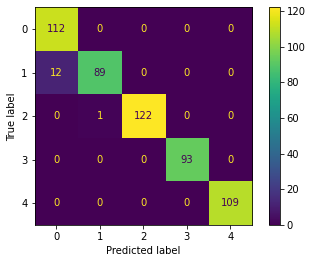

In [174]:
#plot confusion matrix and accuracy evaluation
from sklearn.metrics import accuracy_score, plot_confusion_matrix
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train, y_train)

y_test_hat = knn.predict(x_test) 
test_ac = accuracy_score(y_test,y_test_hat)*100

print("Accuracy for  testing dataset : {:.2f}% \n".format(test_ac) )
plot_confusion_matrix(grid,x_test, y_test,values_format='d' )

In [175]:
#logistic regression task
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [176]:
#set dependent and independent variables
x = np.array(df.drop('num_collisions',axis=1))
y = np.array(df['num_collisions'])

In [184]:
#fitting the model
logit = LogisticRegression(penalty='l2', tol=0.01, C=1, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=5000)
print(logit.fit(x_train,y_train))
print(logit.score(x_test,y_test))

LogisticRegression(C=1, max_iter=5000, tol=0.01)
0.5


In [185]:
confusion_matrix(y, logit.predict(x))

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[180, 137,  81, 107,  33],
       [ 75, 124,  41,  71,  22],
       [ 25,  19,  33,  12,   7],
       [  6,   4,   4,  15,   1],
       [  0,   0,   0,   0,   3]])

Thanks for reviewing this script!